In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./dataset/train_label_balanced.csv")
df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(33312, 81)

In [3]:
#df = df.loc[df['SalePrice_label'].between(6, 8)]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_label
0,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,4
1,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,4
2,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,4
3,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,4
4,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,4


<AxesSubplot:ylabel='Frequency'>

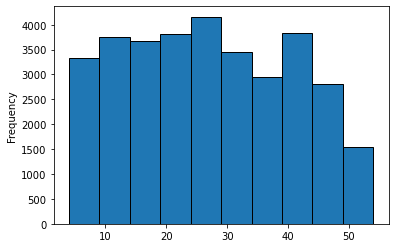

In [4]:
df['SalePrice_label'].plot(kind='hist', edgecolor='black') # 

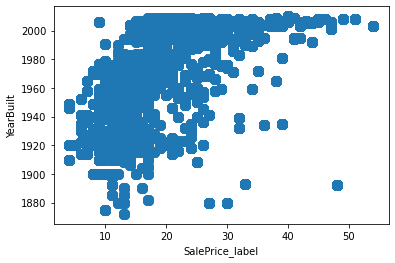

In [5]:
df.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33312 entries, 0 to 33311
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               33312 non-null  int64  
 1   MSSubClass       33312 non-null  int64  
 2   MSZoning         33312 non-null  object 
 3   LotFrontage      29068 non-null  float64
 4   LotArea          33312 non-null  int64  
 5   Street           33312 non-null  object 
 6   Alley            1832 non-null   object 
 7   LotShape         33312 non-null  object 
 8   LandContour      33312 non-null  object 
 9   Utilities        33312 non-null  object 
 10  LotConfig        33312 non-null  object 
 11  LandSlope        33312 non-null  object 
 12  Neighborhood     33312 non-null  object 
 13  Condition1       33312 non-null  object 
 14  Condition2       33312 non-null  object 
 15  BldgType         33312 non-null  object 
 16  HouseStyle       33312 non-null  object 
 17  OverallQual 

In [7]:
df_num = df.select_dtypes(include='number')

In [8]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33312 entries, 0 to 33311
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               33312 non-null  int64  
 1   MSSubClass       33312 non-null  int64  
 2   LotFrontage      29068 non-null  float64
 3   LotArea          33312 non-null  int64  
 4   OverallQual      33312 non-null  int64  
 5   OverallCond      33312 non-null  int64  
 6   YearBuilt        33312 non-null  int64  
 7   YearRemodAdd     33312 non-null  int64  
 8   MasVnrArea       32960 non-null  float64
 9   BsmtFinSF1       33312 non-null  int64  
 10  BsmtFinSF2       33312 non-null  int64  
 11  BsmtUnfSF        33312 non-null  int64  
 12  TotalBsmtSF      33312 non-null  int64  
 13  1stFlrSF         33312 non-null  int64  
 14  2ndFlrSF         33312 non-null  int64  
 15  LowQualFinSF     33312 non-null  int64  
 16  GrLivArea        33312 non-null  int64  
 17  BsmtFullBath

In [9]:
#df_num = df_num.dropna()
#df_num.shape

df_num.fillna(df_num.mean(), inplace=True)
df_num.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


(33312, 38)

In [10]:
df_num = df_num[['LotArea', 'YearBuilt', 'GrLivArea', 'GarageCars','SalePrice_label']]
df_num.head()

,LotArea,YearBuilt,GrLivArea,GarageCars,SalePrice_label
0,7879,1920,720,0,4
1,5000,1946,334,0,4
2,9000,1949,480,1,4
3,5925,1910,968,0,4
4,7879,1920,720,0,4


### Discrétiser YearBuilt

<AxesSubplot:ylabel='Frequency'>

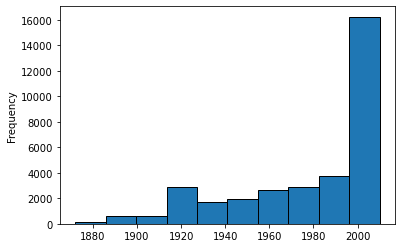

In [11]:
df_num['YearBuilt'].plot(kind='hist', edgecolor='black') #(kind='kde')

In [12]:
df_num_YearBuilt = pd.cut(x      = df_num['YearBuilt'],
                  bins   = [1800, 1910, 1950, 1994, 1996, 2003, 2006, 2008, 2009, 2050],
                  labels = ['ancien+++', 'ancien++', 'ancien+', 'ancien', 'recent', 'recent+', 'recent++', 'recent+++', 'top'])


pd.crosstab(df_num['SalePrice_label'], df_num_YearBuilt)

YearBuilt,ancien+++,ancien++,ancien+,ancien,recent,recent+,recent++,recent+++,top
SalePrice_label,,,,,,,,,
4,128,384,0,0,0,0,0,0,0
5,0,512,0,0,0,0,0,0,0
6,0,640,128,0,0,0,0,0,0
7,0,576,128,0,0,0,0,0,0
8,64,640,128,0,0,0,0,0,0
9,64,352,272,0,0,16,0,0,0
10,64,256,240,0,0,0,0,0,0
11,96,560,320,0,0,0,0,0,0
12,48,296,352,0,0,0,0,0,0


### Discrétiser GrLivArea

<AxesSubplot:ylabel='Frequency'>

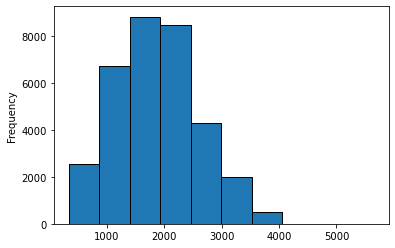

In [13]:
df_num['GrLivArea'].plot(kind='hist', edgecolor='black')

In [14]:
df_num_GrLivArea = pd.cut(x      = df_num['GrLivArea'],
                  bins   = [0, 1000, 2000, 3000, 6000],
                  labels = ['petit', 'moyen', 'moyen+', 'moyen++'])


pd.crosstab(df_num['SalePrice_label'], df_num_GrLivArea)

GrLivArea,petit,moyen,moyen+,moyen++
SalePrice_label,,,,
4,512,0,0,0
5,0,512,0,0
6,512,256,0,0
7,448,256,0,0
8,448,384,0,0
9,432,272,0,0
10,240,304,16,0
11,384,544,48,0
12,296,384,16,0


### Discrétiser LotArea

<AxesSubplot:ylabel='Frequency'>

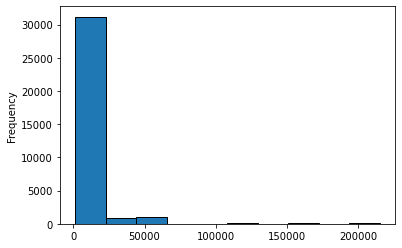

In [15]:
df_num['LotArea'].plot(kind='hist', edgecolor='black')

In [16]:
df_num_LotArea = pd.cut(x      = df_num['LotArea'],
                  bins   = [0, 25000, 300000],
                  labels = ['petit', 'moyen'])


pd.crosstab(df_num['SalePrice_label'], df_num_LotArea)

LotArea,petit,moyen
SalePrice_label,,
4,512,0
5,512,0
6,768,0
7,704,0
8,832,0
9,704,0
10,560,0
11,976,0
12,688,8


### Discrétiser GarageCars

<AxesSubplot:ylabel='Frequency'>

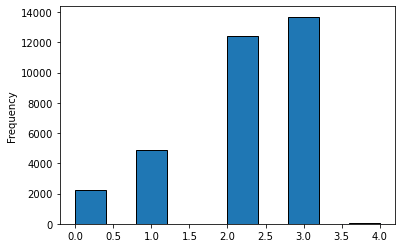

In [17]:
df_num['GarageCars'].plot(kind='hist', edgecolor='black')

In [18]:
df_num_GarageCars = pd.cut(x      = df_num['GarageCars'],
                  bins   = [1, 2, 3, 4, 5],
                  labels = ['petit', 'moyen', 'moyen+', 'grand'])


pd.crosstab(df_num['SalePrice_label'], df_num_GarageCars)

GarageCars,petit,moyen,moyen+
SalePrice_label,,,
6,128,0,0
7,64,0,0
8,192,0,0
9,96,32,0
10,160,16,0
11,240,16,0
12,176,8,0
13,304,8,8
14,400,0,0


## Dichotomisation

In [19]:
df_YearBuilt_dummies = pd.get_dummies(df_num_YearBuilt, prefix='YearBuilt')

In [20]:
df_GrLivArea_dummies = pd.get_dummies(df_num_GrLivArea, prefix='GrLivArea')

In [21]:
df_LotArea_dummies = pd.get_dummies(df_num_LotArea, prefix='LotArea')

In [22]:
df_GarageCars_dummies = pd.get_dummies(df_num_GarageCars, prefix='GarageCars')

In [23]:
df_GarageCars_dummies.head()

,GarageCars_petit,GarageCars_moyen,GarageCars_moyen+,GarageCars_grand
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [24]:
df_num_prepared = df_num.join(df_YearBuilt_dummies).join(df_GrLivArea_dummies).join(df_LotArea_dummies).join(df_GarageCars_dummies)

In [25]:
df_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33312 entries, 0 to 33311
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LotArea              33312 non-null  int64
 1   YearBuilt            33312 non-null  int64
 2   GrLivArea            33312 non-null  int64
 3   GarageCars           33312 non-null  int64
 4   SalePrice_label      33312 non-null  int64
 5   YearBuilt_ancien+++  33312 non-null  uint8
 6   YearBuilt_ancien++   33312 non-null  uint8
 7   YearBuilt_ancien+    33312 non-null  uint8
 8   YearBuilt_ancien     33312 non-null  uint8
 9   YearBuilt_recent     33312 non-null  uint8
 10  YearBuilt_recent+    33312 non-null  uint8
 11  YearBuilt_recent++   33312 non-null  uint8
 12  YearBuilt_recent+++  33312 non-null  uint8
 13  YearBuilt_top        33312 non-null  uint8
 14  GrLivArea_petit      33312 non-null  uint8
 15  GrLivArea_moyen      33312 non-null  uint8
 16  GrLivArea_moyen+     3

### Evolution du modèle

In [26]:
data = df_num_prepared.iloc[:,4:]

target = df_num_prepared['SalePrice_label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66) 

In [28]:
clf = linear_model.LogisticRegression(C = 1.0, max_iter=10000000)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000000)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[107   0   0 ...   0   0   0]
 [  0 112   0 ...   0   0   0]
 [  0   0 145 ...   0   0   0]
 ...
 [  0   0   0 ... 112   0   0]
 [  0   0   0 ...   0 103   0]
 [  0   0   0 ...   0   0  98]]


In [30]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,4,5,6,7,8,9,10,11,12,13,...,42,43,44,45,46,47,48,49,51,54
Classe réelle,,,,,,,,,,,,,,,,,,,,,
4,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,145,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,5,136,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,204,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,4,120,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
clf.score(X_test, y_test)

0.8117964880684376

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       107
           5       1.00      1.00      1.00       112
           6       1.00      1.00      1.00       145
           7       1.00      1.00      1.00       145
           8       0.97      1.00      0.99       172
           9       1.00      0.96      0.98       141
          10       1.00      1.00      1.00       105
          11       0.98      1.00      0.99       204
          12       1.00      0.97      0.98       124
          13       1.00      1.00      1.00       155
          14       0.82      1.00      0.90       202
          15       0.56      0.09      0.16        95
          16       0.69      0.87      0.77       144
          17       0.76      0.68      0.72       128
          18       0.77      0.89      0.82       148
          19       0.91      0.35      0.51       117
          20       0.56      0.90      0.69       172
          21       0.82    

### Courbe ROC

In [33]:
probs = clf.predict_proba(X_test)

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


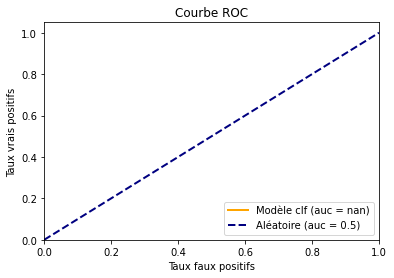

In [35]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## SVM

In [36]:
from sklearn import svm

In [37]:
clf = svm.SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train, y_train)

SVC(gamma=0.01, kernel='poly')

In [38]:
clf.score(X_test, y_test)

1.0